# Salary Predictions Based on Job Descriptions

# Part 1 - DEFINE

### ---- 1 Define the problem ----

We want a mean squared error model to produce the best score possible after evaluating job description training data. Once we select an optimal machine learning model we can then input a similar dataset and predict salaries for each job description within the new dataset.

In [1]:
#import your libraries
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



__author__ = "Skyler Bullard"
__email__ = "skylercarcom@gmail.com"

## Part 2 - DISCOVER

### ---- 2 Load the data ----

In [2]:
#url = "https://...."
#df.read_csv(url, header=None)
#df.read_csv
#df.read_json
#df.read_xlsx

#load the data into a Pandas dataframe
test_df = pd.read_csv('data/test_features.csv')
train_features = pd.read_csv('data/train_features.csv')
train_salaries_df = pd.read_csv('data/train_salaries.csv')

### ---- 3 Clean the data ----

Here we find:

1) 1000000/1000000 unique jobIDs (no duplicates)

2) Each feature containing ZERO missing values


In [3]:
#join training data
train_df = pd.concat([train_features, train_salaries_df], axis=1, join='inner')

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 10 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
jobId                  1000000 non-null object
salary                 1000000 non-null int64
dtypes: int64(3), object(7)
memory usage: 76.3+ MB


In [5]:
train_df.describe(include="all")

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,jobId,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,1000000,NaN
top,JOB1362684456486,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,JOB1362684456486,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,NaN,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,NaN,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,NaN,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,NaN,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,NaN,141.000000


In [6]:
    '''
    Without metadata, some features are not useful and should be removed
    '''
    
headers = ["Job" , "Company", "Type" , "Degree" , "Major" , "Industry" , "YearsExperience" , "DistanceMetropolis" ,"jobId" ,"Salary"]

train_df.columns = headers

train_df.drop( columns = ['Company' , 'jobId'] , axis = 1 , inplace = True)

train_df.head(10)

,Job,Type,Degree,Major,Industry,YearsExperience,DistanceMetropolis,Salary
0,JOB1362684407687,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163
5,JOB1362684407692,MANAGER,DOCTORAL,COMPSCI,FINANCE,2,31,113
6,JOB1362684407693,CFO,NONE,NONE,HEALTH,23,24,178
7,JOB1362684407694,JUNIOR,BACHELORS,CHEMISTRY,EDUCATION,9,70,73
8,JOB1362684407695,JANITOR,HIGH_SCHOOL,NONE,EDUCATION,1,54,31
9,JOB1362684407696,VICE_PRESIDENT,BACHELORS,CHEMISTRY,AUTO,17,68,104


### ---- 4 Explore the data (EDA) ----

In [7]:
#summarize each categorical feature variable

train_df.describe(include = ['O'])

,Job,Type,Degree,Major,Industry
count,1000000,1000000,1000000,1000000,1000000
unique,1000000,8,5,9,7
top,JOB1362684456486,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,125886,236976,532355,143206


In [8]:
#summarize each numeric feature variable

train_df.describe(include = [np.number])

,YearsExperience,DistanceMetropolis,Salary
count,1000000.000000,1000000.000000,1000000.000000
mean,11.992386,49.529260,116.061818
std,7.212391,28.877733,38.717936
min,0.000000,0.000000,0.000000
25%,6.000000,25.000000,88.000000
50%,12.000000,50.000000,114.000000
75%,18.000000,75.000000,141.000000
max,24.000000,99.000000,301.000000


In [9]:
#summarize the target variable

train_df.Salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: Salary, dtype: float64

In [10]:
#look for correlation between each feature and the target

np.unique(train_df.Type)

array(['CEO', 'CFO', 'CTO', 'JANITOR', 'JUNIOR', 'MANAGER', 'SENIOR',
       'VICE_PRESIDENT'], dtype=object)

In [11]:
select_type = train_df[ train_df['Type'] == "CEO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CEO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CEO salaries is  $145 ,000


In [12]:
select_type = train_df[ train_df['Type'] == "CFO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CFO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CFO salaries is  $135 ,000


In [13]:
select_type = train_df[ train_df['Type'] == "CTO" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of CTO salaries is " , "${:.0f}".format(mean), ",000")

The average salary of CTO salaries is  $135 ,000


In [14]:
select_type = train_df[ train_df['Type'] == "VICE_PRESIDENT" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of VICE_PRESIDENT salaries is " , "${:.0f}".format(mean), ",000")

The average salary of VICE_PRESIDENT salaries is  $125 ,000


In [15]:
select_type = train_df[ train_df['Type'] == "SENIOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of SENIOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of SENIOR salaries is  $105 ,000


In [16]:
select_type = train_df[ train_df['Type'] == "MANAGER" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of MANAGER salaries is " , "${:.0f}".format(mean), ",000")

The average salary of MANAGER salaries is  $115 ,000


In [17]:
select_type = train_df[ train_df['Type'] == "JUNIOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of JUNIOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of JUNIOR salaries is  $95 ,000


In [18]:
select_type = train_df[ train_df['Type'] == "JANITOR" ]

df_type = select_type.drop(columns = ['Job', 'Degree', 'Major', 'Industry' , 'YearsExperience', 'DistanceMetropolis'])

mean = df_type.Salary.mean()

print("The average salary of JANITOR salaries is " , "${:.0f}".format(mean), ",000")

The average salary of JANITOR salaries is  $71 ,000


In [19]:
#list average salary for each job type in ascending order

avg_type_dict = {
    
    "JANITOR": "$71,000" ,
    "JUNIOR": "$95,000" ,
    "SENIOR": "$105,000" ,
    "MANAGER": "$115,000" ,
    "VP": "$125,000" ,
    "CTO": "$135,000" ,
    "CFO": "$135,000" ,
    "CEO": "$145,000" 

}

print( avg_type_dict)
print( "Average target: '$116,000'" )

{'JANITOR': '$71,000', 'JUNIOR': '$95,000', 'SENIOR': '$105,000', 'MANAGER': '$115,000', 'VP': '$125,000', 'CTO': '$135,000', 'CFO': '$135,000', 'CEO': '$145,000'}
Average target: '$116,000'


In [20]:
num_cols = [ 'YearsExperience' , 'DistanceMetropolis' , 'Salary']
num_df = train_df[ num_cols ]
num_df.head()

,YearsExperience,DistanceMetropolis,Salary
0,10,83,130
1,3,73,101
2,10,38,137
3,8,17,142
4,8,16,163


In [21]:
#plot the numerical data

def make_plots( df , col):
    
    plt.figure( figsize = ( 14 , 6 ) )
    plt.subplot( 1 , 2 , 1 )
    
    #fill first plot
    
    if df[ col ].dtype == 'int64':
        
        #find count of all unique values in the index
        #sort dataframe based on index lables
        #plot feature
        df[ col ].value_counts().sort_index().plot()
        
    else:
        
        #split data into group based on input parameter
        #select columns included in new df
        #find mean of each column index
        mean = df.groupby( col )[ 'Salary' ].mean()
        
        #change datatype of column
        df[ col ] = df[ col ].astype( 'category' )
        
        df[ col ].value_counts().plot()
        
    plt.xticks( rotation = 45 )
    plt.xlabel( col )
    plt.ylabel( 'Counts' )
    
    #fill second plot 
    
    plt.subplot( 1 , 2 , 2 )
    
    if df[ col ].dtype == 'int64':
        
        #split data into group based on input parameter
        #select columns included in new df
        #find mean of each column index
        mean = df.groupby( col )[ 'Salary' ].mean()
        
        mean.plot()
    
    else:
        
        sns.boxplot( x = col , y = 'Salary' , data = df)
        
    plt.xticks( rotation = 45 )
    plt.ylabel( 'Salaries' )

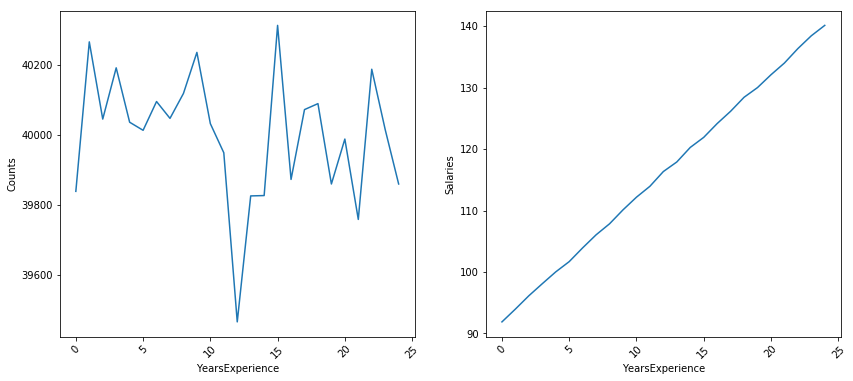

In [22]:
make_plots( num_df , 'YearsExperience' )

We find clear positive correlation between YearsExperience & Salary

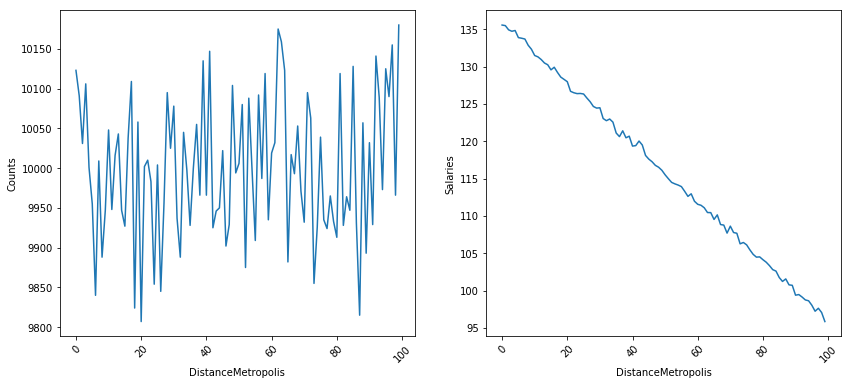

In [23]:
make_plots( num_df , 'DistanceMetropolis' )

We find clear negative correlation between DistanceFromMetropolis & Salary

In [24]:
mean = num_df.groupby( 'YearsExperience' )[ 'Salary' ].mean()
mean

YearsExperience
0      91.873541
1      93.960040
2      96.125184
3      98.090368
4     100.014112
5     101.681154
6     103.921686
7     106.045022
8     107.838601
9     110.106375
10    112.167091
11    113.941425
12    116.342387
13    117.899839
14    120.266277
15    121.903850
16    124.149525
17    126.151303
18    128.427898
19    130.008831
20    132.091377
21    134.002415
22    136.350785
23    138.439010
24    140.131109
Name: Salary, dtype: float64

In [35]:
train_df.describe(include = ['O'])

,Job,Type,Degree,Major,Industry
count,1000000,1000000,1000000,1000000,1000000
unique,1000000,8,5,9,7
top,JOB1362684456486,SENIOR,HIGH_SCHOOL,NONE,WEB
freq,1,125886,236976,532355,143206


In [25]:
#look for correlation between each feature

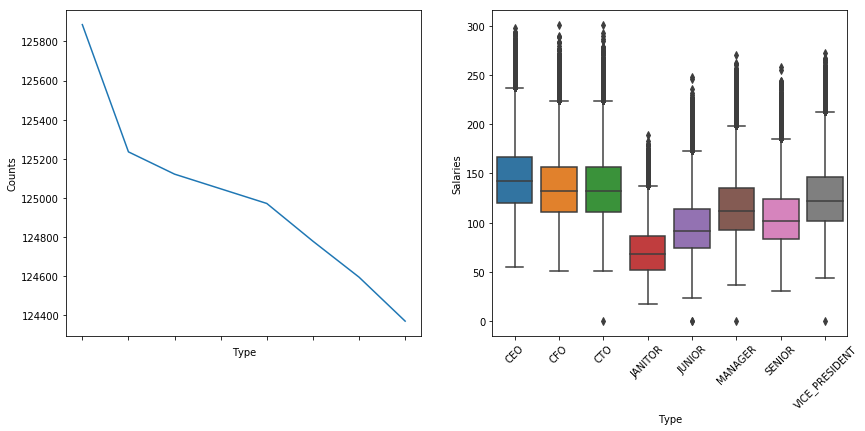

In [36]:
make_plots( train_df , 'Type' )

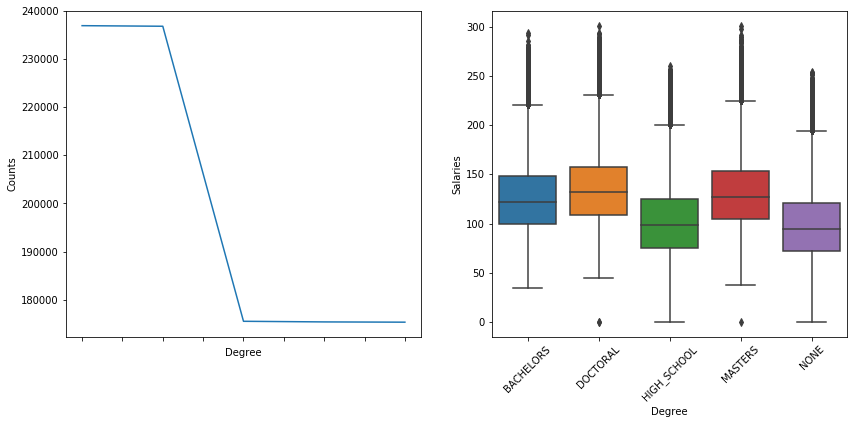

In [39]:
make_plots( train_df , 'Degree' )

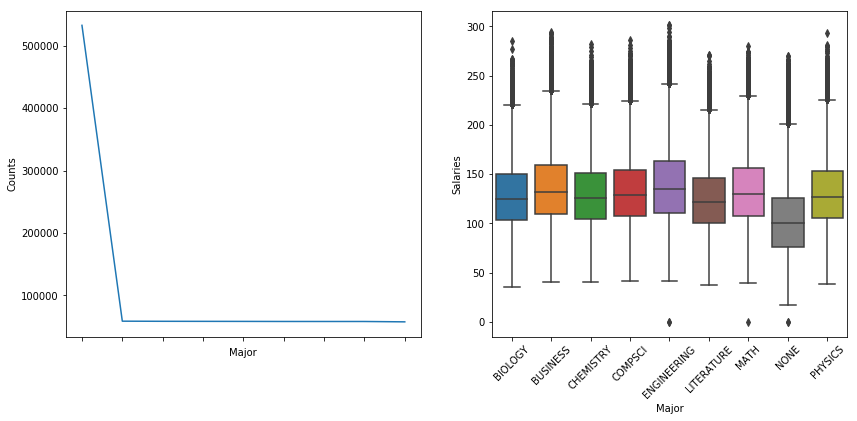

In [37]:
make_plots( train_df , 'Major' )

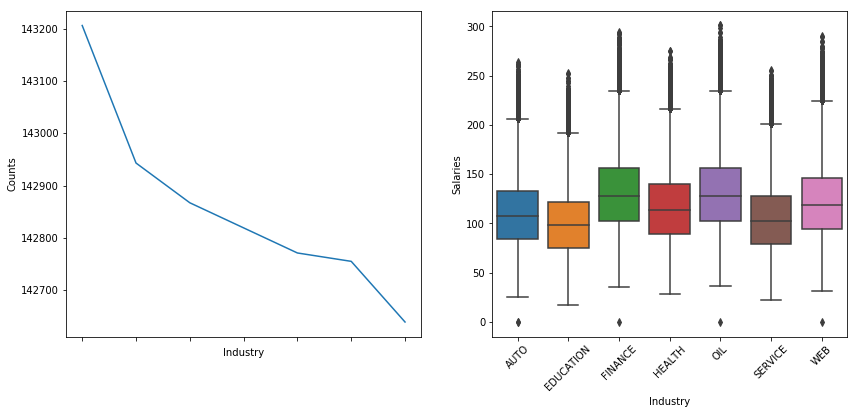

In [38]:
make_plots( train_df , 'Industry' )

### ---- 5 Establish a baseline ----

In [26]:
#select a reasonable metric (MSE in this case)
#create an extremely simple model and measure its efficacy
#e.g. use "average salary" for each industry as your model and then measure MSE
#during 5-fold cross-validation

### ---- 6 Hypothesize solution ----

In [27]:
#brainstorm 3 models that you think may improve results over the baseline model based
#on your 

Brainstorm 3 models that you think may improve results over the baseline model based on your EDA and explain why they're reasonable solutions here.

Also write down any new features that you think you should try adding to the model based on your EDA, e.g. interaction variables, summary statistics for each group, etc

## Part 3 - DEVELOP

You will cycle through creating features, tuning models, and training/validing models (steps 7-9) until you've reached your efficacy goal

#### Your metric will be MSE and your goal is:
 - <360 for entry-level data science roles
 - <320 for senior data science roles

### ---- 7 Engineer features  ----

In [28]:
#make sure that data is ready for modeling
#create any new features needed to potentially enhance model

### ---- 8 Create models ----

In [29]:
#create and tune the models that you brainstormed during part 2

### ---- 9 Test models ----

In [30]:
#do 5-fold cross validation on models and measure MSE

### ---- 10 Select best model  ----

In [31]:
#select the model with the lowest error as your "prodcuction" model

## Part 4 - DEPLOY

### ---- 11 Automate pipeline ----

In [32]:
#write script that trains model on entire training set, saves model to disk,
#and scores the "test" dataset

### ---- 12 Deploy solution ----

In [33]:
#save your prediction to a csv file or optionally save them as a table in a SQL database
#additionally, you want to save a visualization and summary of your prediction and feature importances
#these visualizations and summaries will be extremely useful to business stakeholders

### ---- 13 Measure efficacy ----

We'll skip this step since we don't have the outcomes for the test data